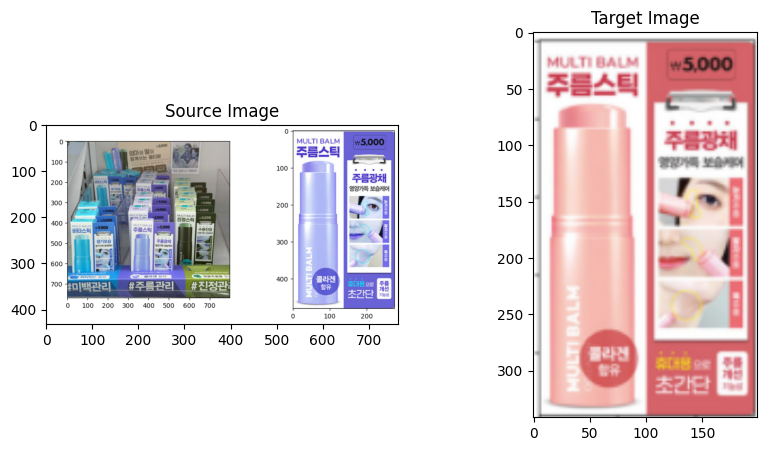

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/두산로보틱스_딥러닝_컴퓨터비전/7기_컴퓨터비전 응용/교육생제공용/data/beau_3.png'
target_path = '/content/drive/MyDrive/두산로보틱스_딥러닝_컴퓨터비전/7기_컴퓨터비전 응용/교육생제공용/data/new_target.png'

# Load images
image = cv2.imread(image_path)
target_image = cv2.imread(target_path)

# Check if images are loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}")
elif target_image is None:
    print(f"Error: Could not load target image from {target_path}")
else:
    # Convert BGR to RGB for matplotlib display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    target_image_rgb = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image_rgb)
    axes[0].set_title('Source Image')
    axes[1].imshow(target_image_rgb)
    axes[1].set_title('Target Image')
    plt.show()

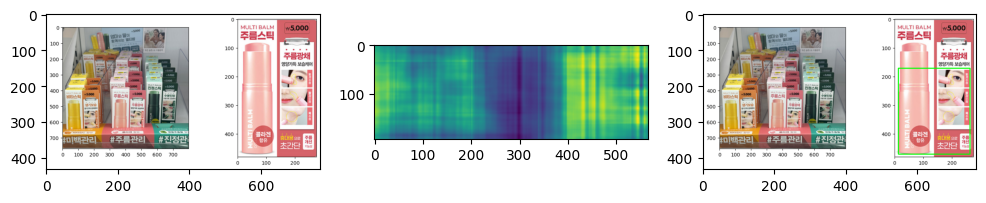

In [5]:
#1.그레이스케일로 변환
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

target = cv2.imread(target_path)
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
target_gray = cv2.resize(target_gray, (200,240)) #타겟의 회전, 크기 변화, 밝기 변화 가 영향을 많이 미침
# 템플릿 크기 200*240px 조정 (**)
# 중요: 템플릿 매칭은 크기가 정확하게 맞아야 작동함

#2.템플릿의 너비와 높이를 찾음
w, h = target_gray.shape[::-1]
# 원래 shape는 (높이, 너비)순서임
# [::-1] 역순 >> (너비, 높이)
# 왜? 나중에 사각형 그릴 때 필요하다

#3.템플릿을 이미지에서 매칭해서 찾아봐!
#매칭 옵션 : SQDIFF(픽셀 제곱차이), CCORR(픽셀 곱의 합), CCOEFF(코사인유사도)  X NORMED(일정한 범위 내로 만듦)
result = cv2.matchTemplate(image_gray, target_gray, cv2.TM_CCOEFF_NORMED)
# SQDIFF(픽셀 제곱차이) 작을수록 유사
# CCORR(픽셀 곱의 합) 클수록 유사
# TM_CCOEFF_NORMED : 클수록 유사
# NORMED(일정한 범위 내로 만듦) 정규화 (0-1 범위로 만들기)

#매칭 결과에서 최소값, 최대값, 최소값 위치, 최대값 위치를 찾으려고 함
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
# min_val: 가장 낮은 유사도 값
# min_loc : 가장 낮은 유사도 위치 (가장 안 비슷한 위치)

# max_val, max_loc : 가장 유사도 값이 높고, 가장 비슷한 위치(x,y) 좌표를 우리는 원해요

#시각화
top_left = max_loc #가능성이 높은 지역의 왼쪽 위 모서리
#top_left = (x, y)형태라서 top_left[0]는 x좌표, top_left[1]는 y좌표
bottom_right = (top_left[0]+w, top_left[1]+h) #왼쪽 위 모서리를 기준으로 +너비, +높이해서 구한 오른쪽 아래 모서리
# (top_left[0]+w, top_left[1]+h) : x+w. y+h
matched = image.copy()
cv2.rectangle(matched, top_left, bottom_right, (0, 255, 0), 2)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image)
axes[1].imshow(result)
axes[2].imshow(matched)
plt.show()

In [6]:
target_gray.shape  # (높이, 너비)

(240, 200)

In [7]:
target_gray.shape[::-1] # (너비, 높이)

(200, 240)